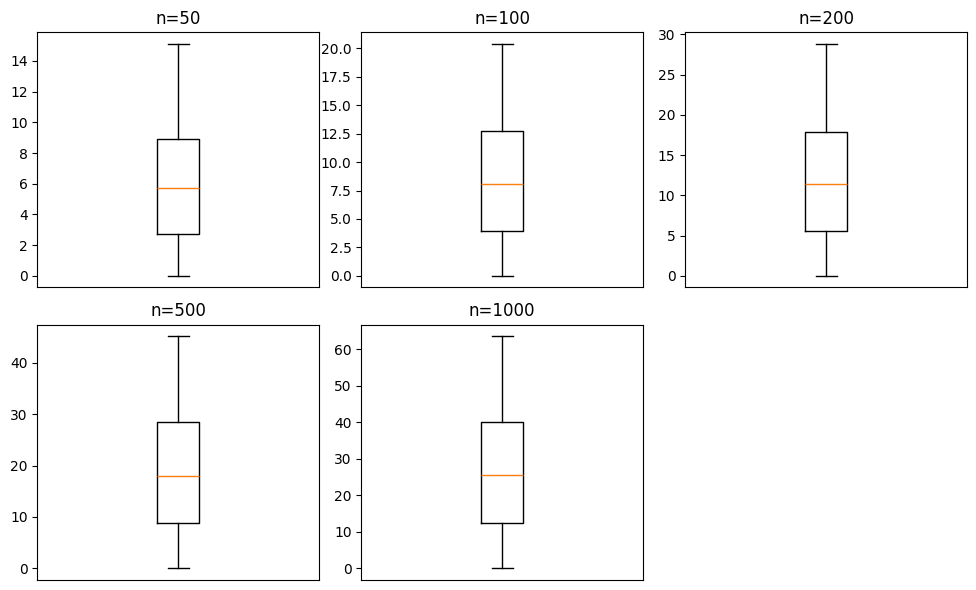

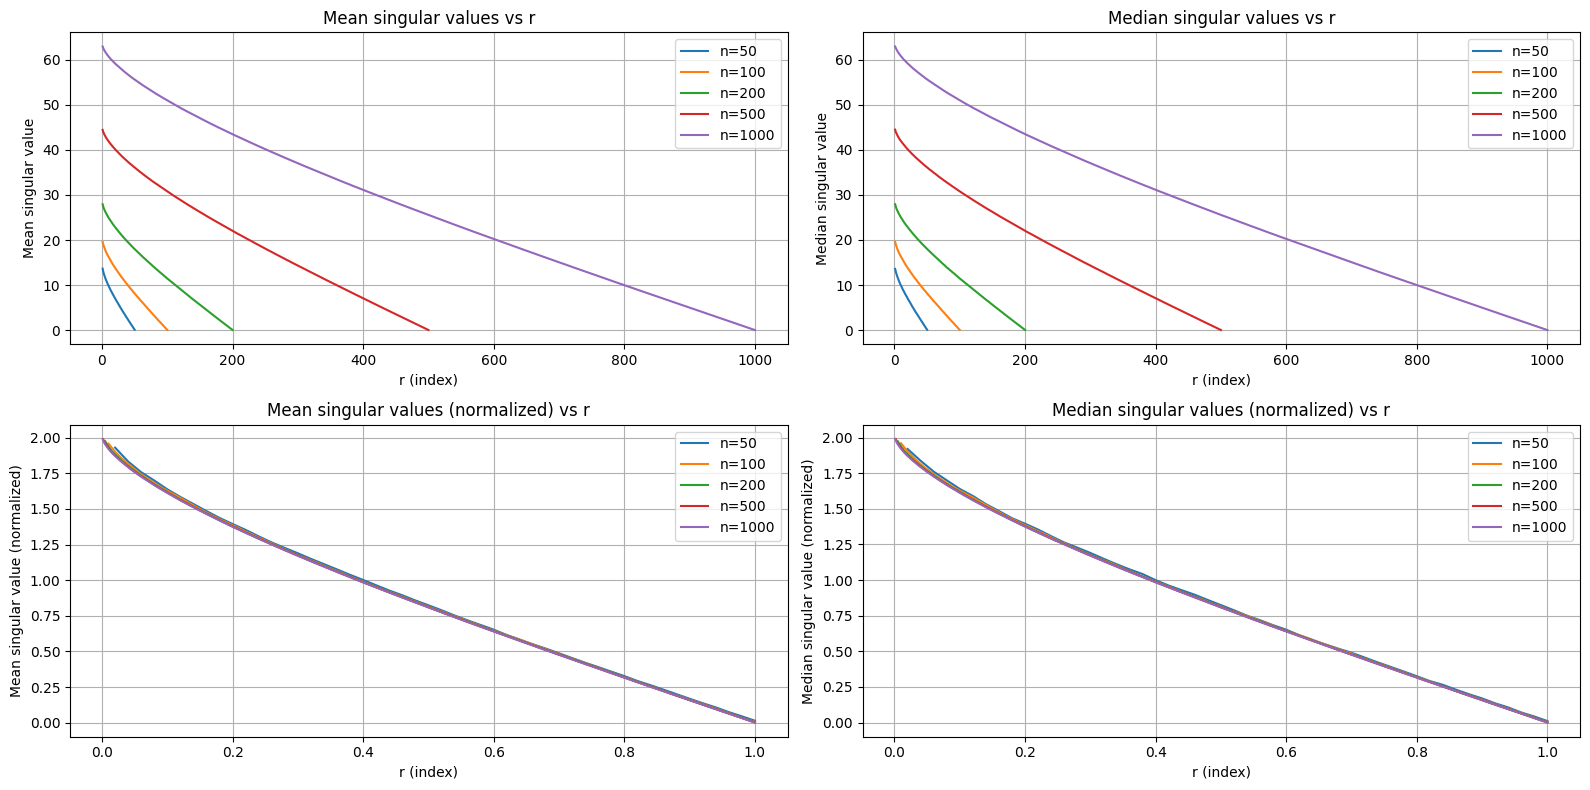

In [30]:
import matplotlib.pyplot as plt
import numpy as np

sizes = [50, 100, 200, 500, 1000]
nRuns = 100

fig_box, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.ravel()

fig_stats, ((ax_mean, ax_median), (ax_mean_norm, ax_median_norm)) = plt.subplots(2, 2, figsize=(16, 8))
for i, nPoints in enumerate(sizes):
    all_S = []
    for _ in range(nRuns):
        X = np.random.randn(nPoints, nPoints)
        _, S, _ = np.linalg.svd(X, full_matrices=False)
        all_S.append(S)
    all_S = np.array(all_S)
    S_all = all_S.ravel()

    ax = axes[i]
    ax.boxplot(S_all, vert=True)
    ax.set_title(f'n={nPoints}')
    ax.set_xticks([])

    # Plot mean and median singular values vs index r
    r = np.arange(1, nPoints + 1)
    S_mean = all_S.mean(axis=0)
    S_median = np.median(all_S, axis=0)
    ax_mean.plot(r, S_mean, label=f'n={nPoints}')
    ax_median.plot(r, S_median, label=f'n={nPoints}')
    ax_mean_norm.plot(r/nPoints, S_mean / np.sqrt(nPoints), label=f'n={nPoints}')
    ax_median_norm.plot(r/nPoints, S_median / np.sqrt(nPoints), label=f'n={nPoints}')

axes[-1].axis('off')
fig_box.tight_layout()

ax_mean.set_xlabel('r (index)')
ax_mean.set_ylabel('Mean singular value')
ax_mean.set_title('Mean singular values vs r')
ax_mean.grid()
ax_mean.legend()

ax_median.set_xlabel('r (index)')
ax_median.set_ylabel('Median singular value')
ax_median.set_title('Median singular values vs r')
ax_median.grid()
ax_median.legend()

ax_mean_norm.set_xlabel('r (index)')
ax_mean_norm.set_ylabel('Mean singular value (normalized)')
ax_mean_norm.set_title('Mean singular values (normalized) vs r')
ax_mean_norm.grid()
ax_mean_norm.legend()

ax_median_norm.set_xlabel('r (index)')
ax_median_norm.set_ylabel('Median singular value (normalized)')
ax_median_norm.set_title('Median singular values (normalized) vs r')
ax_median_norm.grid()
ax_median_norm.legend()

fig_stats.tight_layout()
plt.show()


`S_mean` shows the **mean singular value at each index \(r\)** across all 100 runs.

- For each matrix size (50, 100, 200, 500, 1000), you compute the SVD 100 times.
- At each singular value index \(r\) (1 to nPoints), you average the singular values across those 100 runs.
- The plot shows how the **average spectrum decays** with increasing index.

So it's a summary curve showing the **typical** singular value spectrum for a random Gaussian matrix of that size—larger singular values at the start, decaying toward smaller ones at the tail.

Larger matrices have larger singular values because of **how norm scales with matrix size**.

For a random Gaussian \(n x n\) matrix:
- Each entry is independent with variance 1.
- The **Frobenius norm** (sum of squared entries) grows as \(sqrt{n^2} = n\).
- The largest singular value \(\sigma_1\) scales roughly as \(sqrt{n}\).

So a \(1000 x 1000\) matrix has more entries (~100× more) and thus a larger cumulative "energy" than a \(50 x 50\) matrix. This is why the mean singular values are proportionally larger—not because the data is "stronger," but because the matrix is geometrically bigger.

If you **normalize** by dividing by \(sqrt{n}), all the spectra would overlap.